# Unsupervised Learning
- 차원 축소: `데이터의 차원`을 축소 하는 것
- 군집: 데이터를 `비슷한` 것끼리 묶는 것

## 차원 축소
### PCA (Principal component analysis, 주성분분석)
- step1: 분산이 가장 큰 방향을 찾음 ( 차원.. 컬럼의 개수라고 생각하면 됨! / 13개 --> 2개.. 이 데이터를 대표할 수 있는 방향!(데이터의 특성을 가장 잘 보여주는..가장 많은 정보를 가지고 있다..) = 분산이 큰 방향! 하지만 하나의 차원을 말하는거지, 하나의 컬럼을 말하는게 아님!! 13차원 중 가장 분산이 큰 방향(여러 컬럼의 내용을 담고 있을 거임)
- 주성분1이 가지고 있지 않은걸 가장 많이 가지고 있는게 직각.. >> 주성분2

- 데이터를 덜 소실시키면서 데이터의 차원을 줄인다!(데이터를 최대한 유지하며 데이터의 차원을 줄인다)

차원축소가 왜 필요할까?
- 차원 축소하면 우리가 이해할 수 있는 수준으로 `시각화` 가능! ex. 30차원 > 2차원 (좌표평면에 시각화 가능)
- 시각화할 때 가장 많이 씀! 차원축소를!
- 1. 데이터 시각화 2. 모델에 fit할 때 주성분을 넣음(이건 거의x > 실무적으로 봤을때.. 데이터 자체를 넣어주는게 .. 좋음>정보 다담고 있으니까)

PCA가 잘 안된다?
- TSNE
- PCA처럼 또다른 원리로 차원을 축소해줌! 이것까지는 시도해볼만 함!
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

PCA 단점
- 그래프의 두 축을 해석하기 쉽지 않다. (정확하게 해석x)
- 각 주성분 아래의 각 컬럼이 어느 정도의 정보를 담고있냐..(히트맵으로 시각화했을 때 >> 어두운 색일수록 적게 같고 있음)
- 주성분.. 모든 정보들 조금씩 다 들어가 있음!!(하나의 컬럼 정보만 가지는거 아님!) > 주성분2에서 가장 밝은색이 주성분1에서 적은 정보를 방향을 중심으로 정보를 담고 있음

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data

In [14]:
X.shape # 데이터 시각화해서 보고 싶으면 > pd.DataFrame(X)

(569, 30)

In [ ]:
# StandardScaler를 활용하여 스케일 변환

In [17]:
from sklearn.preprocessing import StandardScaler

# scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # n_components : 주성분 개수
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print('원본 데이터 사이즈 :', X_scaled.shape)
print('차원 축소한 데이터 사이즈 :', X_pca.shape)
print(pca.explained_variance_ratio_) # 주성분이 데이터를 설명하는 비율(이 데이터를 얼마나 설명하냐, 몇% 설명하냐) >> n_components 바꿔보기
print(pca.explained_variance_ratio_.sum()) # n을 늘릴수록 1에 가까움. 근데 시각화하기 위해서는 2개만 필요!! >> 30하면 1나옴!

원본 데이터 사이즈 : (569, 30)
차원 축소한 데이터 사이즈 : (569, 2)
[0.44272026 0.18971182]
0.6324320765155949


In [30]:
X_pca # 1열이 X축, 2열이 Y축 > plot(x,y)

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [39]:
component1 = X_pca[:,0]
component2 = X_pca[:,1]

In [40]:
X_pca.shape

(569, 2)

In [41]:
target = cancer.target

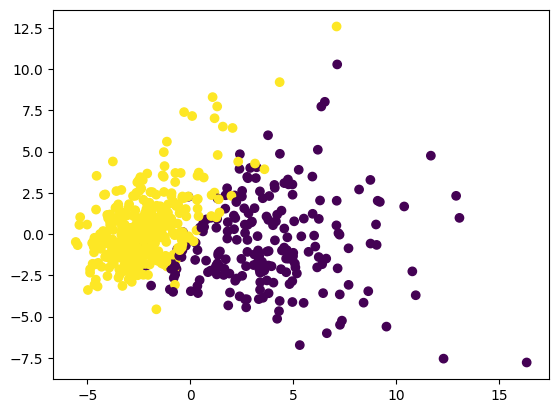

In [42]:
import matplotlib.pyplot as plt
plt.scatter(component1, component2, c = target)

In [43]:
pca.components_ # 각 성분에 칼럼 정보가 어느정도 담겨 있는지?

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

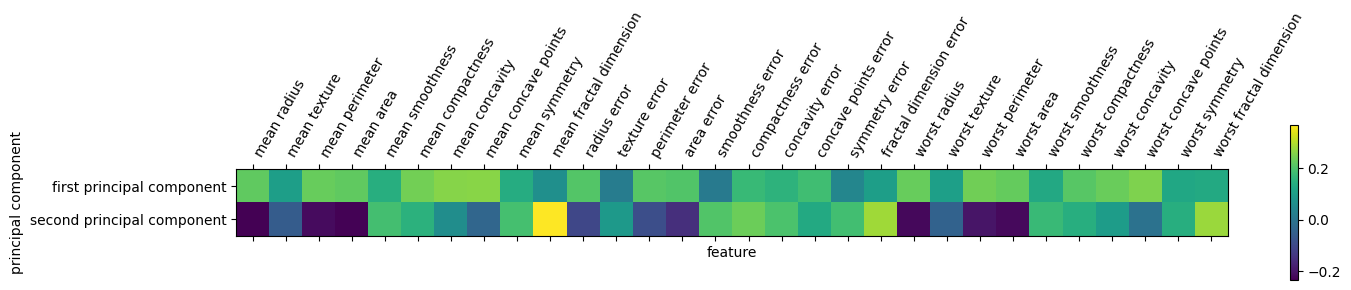

In [45]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first principal component", "second principal component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("principal component")
plt.show()

### 주성분 분석 실습

In [ ]:
# 스케일 변환(StandardScaler / RobustScaler / MinMaxScaler / Normalizer)
# 차원축소
# 축소 된 차원 시각화
# 각 성분이 데이터를 어느정도 설명하는지 bar plot ( pca.explained_variance_ratio_)
# (가용하다면) 각 성분이 칼럼의 정보를 어느정도 설명하는지 히트맵

In [71]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris_data = load_iris()
iris_input_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_target_data = pd.DataFrame(iris_data.target, columns = ['target'])
iris = pd.concat([iris_input_data, iris_target_data], axis = 1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [49]:
iris_input_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
X = iris_data.data
X.shape

(150, 4)

In [53]:
# 스케일 변환
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [ ]:
# 여러 스케일러 사용해보고 그래프 변화 살펴보기
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

# scaler = RobustScaler()
# scaler = StandardScaler()

In [54]:
# 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print('원본 데이터 사이즈 :', X_scaled.shape)
print('차원 축소한 데이터 사이즈 :', X_pca.shape)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.sum())

원본 데이터 사이즈 : (150, 4)
차원 축소한 데이터 사이즈 : (150, 2)
[0.962373   0.02758655]
0.989959545919298


([<matplotlib.axis.XTick at 0x21385d9f160>,
 [Text(0, 0, 'first principal component'),
  Text(1, 0, 'second principal component')])

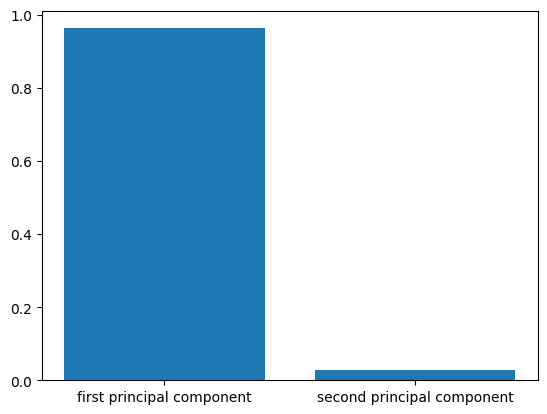

In [68]:
# 각 성분이 데이터를 어느정도 설명하는지 bar plot(pca.explained_variation_ratio_)
plt.bar([0,1],pca.explained_variance_ratio_)
plt.xticks([0, 1], ["first principal component", "second principal component"])

# 더 직관적인 코드
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# plt.bar(x = ['component1', 'component2'], height=pca.explained_variance_ratio_)

In [55]:
X_pca

array([[ 0.30163722,  0.00071565],
       [ 0.27092065,  0.04235377],
       [ 0.29767949,  0.00240655],
       [ 0.26266611,  0.00266704],
       [ 0.30746945, -0.01871929],
       [ 0.275612  , -0.03444468],
       [ 0.28980438, -0.03967502],
       [ 0.28272107,  0.00228959],
       [ 0.26267711,  0.01087568],
       [ 0.26981556,  0.03649911],
       [ 0.29980315,  0.00193011],
       [ 0.26894153, -0.01624238],
       [ 0.27699897,  0.0419604 ],
       [ 0.3219414 ,  0.00140409],
       [ 0.34876933,  0.00486114],
       [ 0.32366368, -0.05650449],
       [ 0.32360826, -0.03014443],
       [ 0.29581749, -0.00659527],
       [ 0.27608892,  0.00524753],
       [ 0.29990233, -0.03996396],
       [ 0.25805873,  0.03131347],
       [ 0.28863385, -0.03658506],
       [ 0.363187  , -0.05014394],
       [ 0.23311232, -0.00311721],
       [ 0.22878198, -0.02023955],
       [ 0.24394342,  0.04727866],
       [ 0.25775078, -0.01389244],
       [ 0.28872239,  0.00756523],
       [ 0.29573627,

In [59]:
component1 = X_pca[:,0]
component2 = X_pca[:,1]

In [60]:
target = iris_data.target

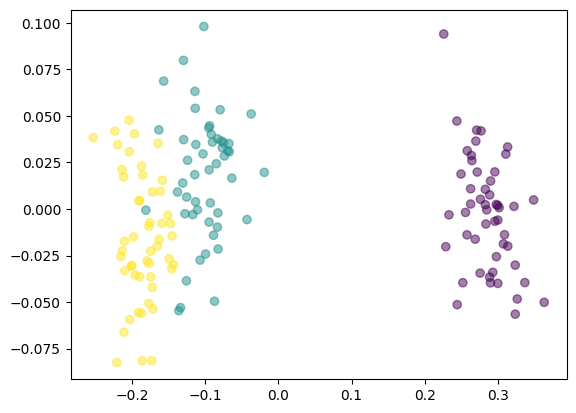

In [69]:
# 축소된 차원 시각화
import matplotlib.pyplot as plt
plt.scatter(component1, component2, c = target, alpha=0.5)

In [62]:
pca.components_

array([[ 0.18359702,  0.49546167, -0.76887947, -0.36004754],
       [ 0.60210709, -0.64966313, -0.05931229, -0.46031175]])

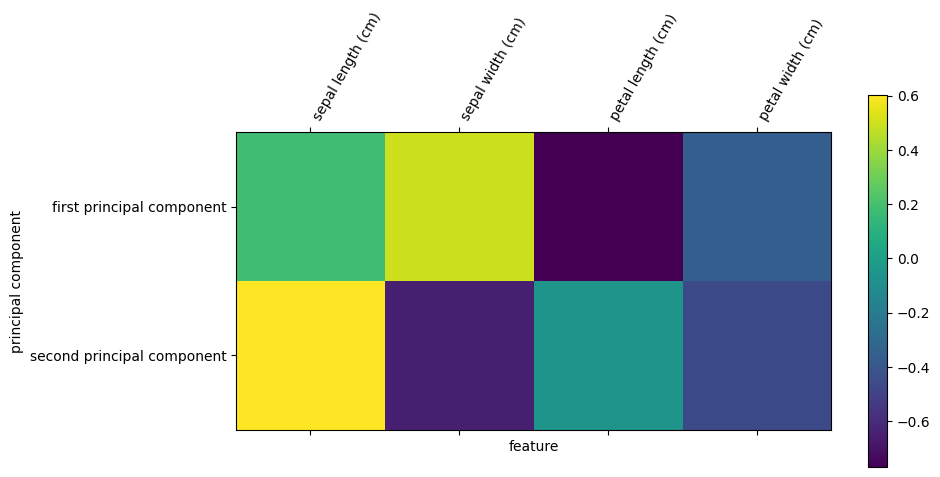

In [64]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first principal component", "second principal component"])
plt.colorbar()
plt.xticks(range(len(iris_data.feature_names)),
           iris_data.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("principal component")
plt.show()

## Clustering (군집화)
종류
- K-means clustering
- DBSCAN

K-means 알고리즘 순서
- 임의의 데이터가 입력이 됨(입력 데이터)
- 몇 개의 조로 모여!(3개의 cluster) >> 임의의 3점을 고름 >> 그 고른 지점으로부터 편가르기 시작(나한테 가까운 사람은 내편, 아니면 다른편)
- 내 편에서 가운데로 감(중심점을 옮김) >> 이 중심에서 내 편을 다시 가름
- 위 과정을 반복(중심계산, 포인트 재할당)
- 포인트에 변화가 없을 때 알고리즘 정지

target >> 실제값

target과 label_kmc가 다른 경우..
- 결과값을 모르고 비슷한 애들끼리 분류한거니까 결과값이랑 동일한 숫자가 나올 필요는 없음!
- 분류만 해준거임! 분류는 잘함!

In [149]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, # 데이터 개수
                 n_features=2,  # X, y
                 centers=5,     # 데이터 중심 개수
                 random_state=10)

In [73]:
X

array([[ -5.57785425,   5.87298826],
       [  1.62783216,   4.17806883],
       [ -6.95088443,  -9.02459449],
       [ -0.95276902,  -5.03431566],
       [  6.55010412,  -7.9123388 ],
       [ -6.67870531,   5.52444477],
       [ -5.52802829,   5.62491189],
       [ -8.03866378,  -8.91215049],
       [  5.55912116, -10.06110303],
       [ -7.26457869,   4.98882111],
       [ -5.61092213,  -8.52762972],
       [ -4.69881639,   5.23992395],
       [  6.68288513, -10.31693051],
       [  0.6769707 ,  -6.29133602],
       [  5.69192445,  -9.47641249],
       [ -6.08678403,   4.7298269 ],
       [  3.51518944,   5.17965845],
       [ -0.09177178,  -6.25796005],
       [  6.91094987, -10.6647659 ],
       [ -7.16184674,   4.8218863 ],
       [ -6.32637212,   3.85130367],
       [  1.20634557,  -3.03874201],
       [  2.44078244,   4.47434875],
       [ -7.64253624,  -8.07280455],
       [ -5.66098962,   6.82502222],
       [ -5.0162266 ,   5.37742451],
       [  0.26308097,  -5.97487434],
 

In [150]:
input = pd.DataFrame(X, columns = ['feature1', 'feature2'])
target = pd.DataFrame(y, columns = ['target'])

In [151]:
df = pd.concat([input, target], axis=1)
df.head()

,feature1,feature2,target
0,-5.577854,5.872988,3
1,1.627832,4.178069,1
2,-6.950884,-9.024594,4
3,-0.952769,-5.034316,2
4,6.550104,-7.912339,0


<AxesSubplot: xlabel='feature1', ylabel='feature2'>

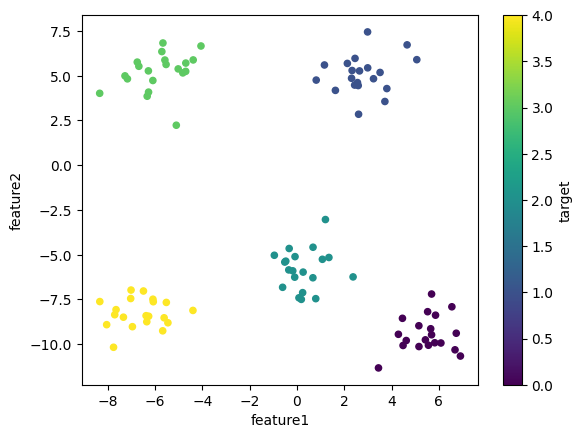

In [152]:
# 실제 target
df.plot.scatter(x = 'feature1', y = 'feature2', c = 'target', colormap = 'viridis') # target기준임. clustering하기 전임.

In [153]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 5, random_state = 1004)
kmc.fit(df.iloc[:,:-1]) # target제외 > drop해도됨. 아니면 X.
label_kmc = kmc.labels_
print(label_kmc)

[3 1 0 4 2 3 3 0 2 3 0 3 2 4 2 3 1 4 2 3 3 4 1 0 3 3 4 2 0 1 4 4 2 4 3 2 0
 4 0 1 4 4 4 2 0 0 3 2 1 2 1 2 3 0 2 2 4 1 4 0 2 1 1 4 3 1 2 1 2 0 0 3 1 2
 4 4 0 1 3 3 2 2 1 4 1 0 4 0 4 0 1 0 3 1 1 1 0 3 3 0]


C:\Users\SBAUser\.venv\Second_Day\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [154]:
df['label_kmc'] = label_kmc
df.head()

,feature1,feature2,target,label_kmc
0,-5.577854,5.872988,3,3
1,1.627832,4.178069,1,1
2,-6.950884,-9.024594,4,0
3,-0.952769,-5.034316,2,4
4,6.550104,-7.912339,0,2


<AxesSubplot: xlabel='feature1', ylabel='feature2'>

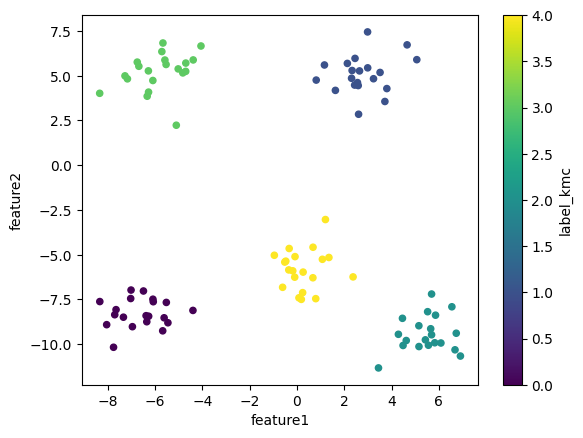

In [155]:
# k-means clustering으로 예측한 label
df.plot.scatter(x = 'feature1', y = 'feature2', c = 'label_kmc', colormap = 'viridis') 

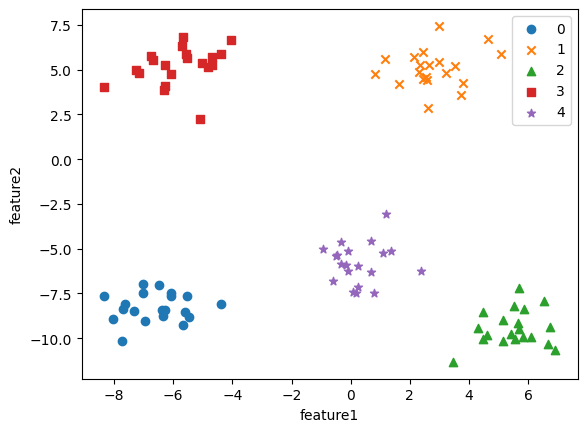

In [156]:
# k-means clustering을 이용한 데이터 플랏
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['feature1']
    X2 = df_i['feature2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.show()

### 실습

In [ ]:
# k-means 클러스터링 수행하기
# 수행한 결과를 scatter chart로 그리고 실제 label과 비교하기
# DBSCAN으로 클러스터링 수행
# k-means vs DBSCAN 클러스터링 결과 비교하기

In [101]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris_data = load_iris()
iris_input_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_target_data = pd.DataFrame(iris_data.target, columns = ['target'])
iris = pd.concat([iris_input_data, iris_target_data], axis = 1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [102]:
X = iris_data.data
y = iris_data.target

In [89]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [127]:
# 시각화를 위한 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
pca.fit(X)

X_pca = pca.transform(X)

In [128]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [129]:
component1 = X_pca[:,0]
component2 = X_pca[:,1]

In [130]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, random_state = 1004)
kmc.fit(X) 
label_kmc = kmc.labels_
print(label_kmc)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


C:\Users\SBAUser\.venv\Second_Day\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [131]:
df['label_kmc'] = label_kmc
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label_kmc
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


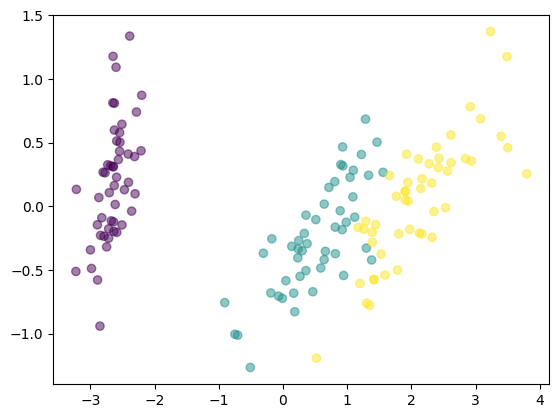

In [145]:
# 실제 target
import matplotlib.pyplot as plt
plt.scatter(component1, component2, c = iris_data.target, alpha=0.5)

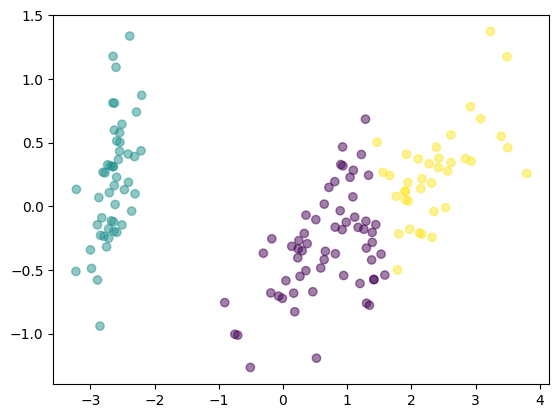

In [135]:
# label_kmc
import matplotlib.pyplot as plt
plt.scatter(component1, component2, c = label_kmc, alpha=0.5)

### K-means 단점
- 물어보기.. 하이퍼파라미터..음..?!?!
- 무조건 모든 데이터를 활용함.. 약간 불필요한 데이터를 빼주지 못함.
- 가까이 있는 거리 중심으로 하기 때문에 우리가 원하는 분류가 안될수 있음.

### DBSCAN
- k-means 단점 보완해서 나옴
- eps : 내편의 범위(입실론) >>> 내 편의 범위가 늘어남..
- 입실론 1구역안에 5개가 안되서 처음에 안만들어짐. (다른애들은 1.5안에 5개 되는애가 없어서 한 그룹만 만들어지는거임)
- kmeans는 중심을 가지고 내편을 구하는.. / 저렇게 생긴 애들도 dbscan은 분류할 수 있음(중심으로 분류하는게 아니라!)
- -1은 아무군데도 포함되지 않는 값임!

In [1]:
# 데이터 생성
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, 
                 noise=0.05 ,
                 random_state=0)

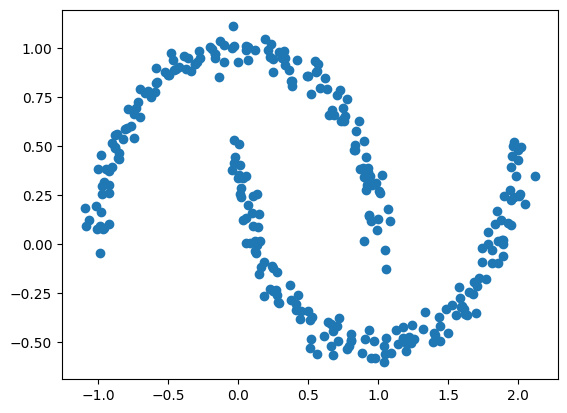

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [89]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.3) # dbs = DBSCAN(min_samples=8, eps=0.2) >> min_samples랑 eps 바꿔보고 관찰하기(min커지면 eps도 같이 커져야 clustering이 잘 될거임!)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


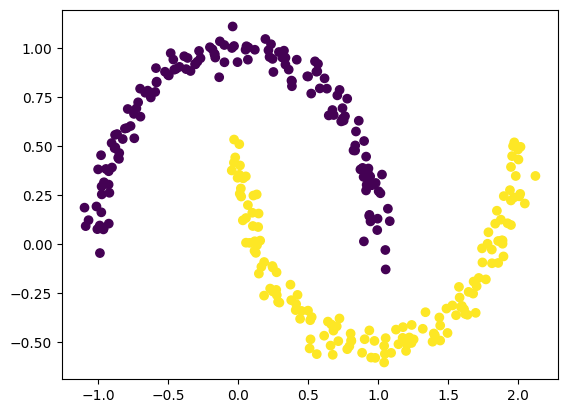

In [90]:
# 실제 target
plt.scatter(X[:,0], X[:,1], c=y)

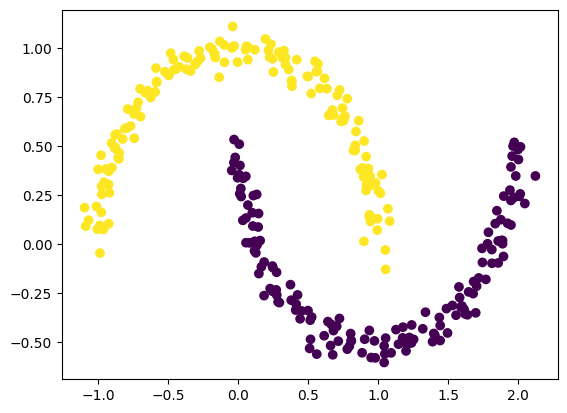

In [91]:
# DBSCAN으로 clustering한 결과
plt.scatter(X[:,0], X[:,1], c=label_dbs)

In [ ]:
## iris data가지고 DBSCAN으로도 해보기!!!!!!
## legend랑 marker도 추가해보기!